# Cardano Price Analysis

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 21.8 MB/s eta 0:00:00


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.9 MB/s eta 0:00:00


In [ ]:
!pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 6.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pmd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as stats

In [ ]:
import pylab

In [ ]:
cardano_history = pd.read_csv("cardano_data/Cardano_d_23_24.csv", delimiter=';', parse_dates= ['timeOpen','timeClose', 'timeHigh', 'timeLow'])

print(cardano_history.head())
# print(cardano_history.shape)
# print(type(cardano_history))

                   timeOpen                        timeClose  \
0 2024-11-20 00:00:00+00:00 2024-11-20 23:59:59.999000+00:00   
1 2024-11-19 00:00:00+00:00 2024-11-19 23:59:59.999000+00:00   
2 2024-11-18 00:00:00+00:00 2024-11-18 23:59:59.999000+00:00   
3 2024-11-17 00:00:00+00:00 2024-11-17 23:59:59.999000+00:00   
4 2024-11-16 00:00:00+00:00 2024-11-16 23:59:59.999000+00:00   

                   timeHigh                   timeLow  name      open  \
0 2024-11-20 09:47:00+00:00 2024-11-20 00:01:00+00:00  2781  0.739637   
1 2024-11-19 07:07:00+00:00 2024-11-19 22:34:00+00:00  2781  0.734580   
2 2024-11-18 08:31:00+00:00 2024-11-18 00:02:00+00:00  2781  0.702301   
3 2024-11-17 00:28:00+00:00 2024-11-17 02:17:00+00:00  2781  0.738731   
4 2024-11-16 15:10:00+00:00 2024-11-16 00:00:00+00:00  2781  0.703398   

       high       low     close        volume     marketCap  \
0  0.846629  0.739472  0.800345  3.799020e+09  2.805432e+10   
1  0.763529  0.723858  0.739642  1.551275e+09  2.5

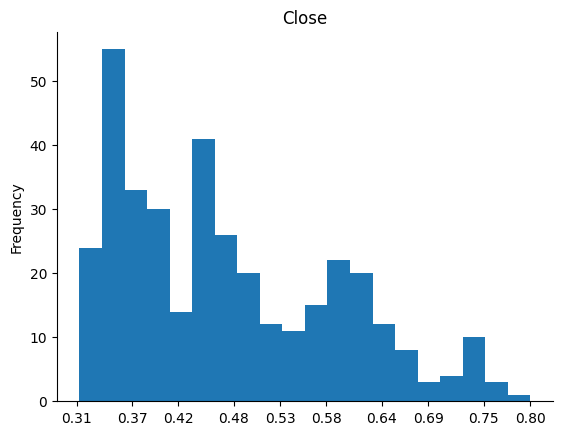

In [ ]:
cardano_history['close'].plot(kind='hist', bins=20, title='Close')
ticks = np.linspace(cardano_history['close'].min(), cardano_history['close'].max(), 10)
plt.xticks(ticks=np.round(ticks, 2))
plt.gca().spines[['top', 'right',]].set_visible(False)

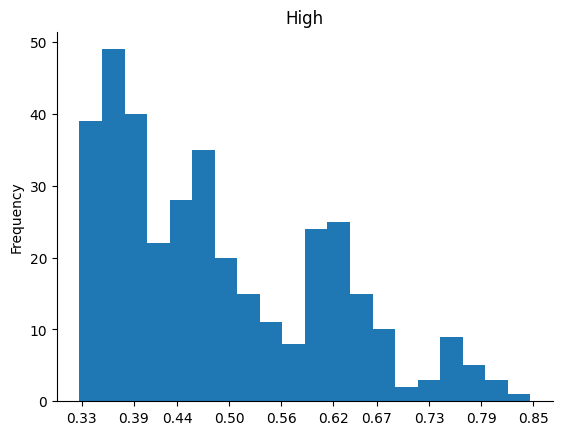

In [ ]:
cardano_history['high'].plot(kind = 'hist', bins = 20, title = 'High')
ticks = np.linspace(cardano_history['high'].min(), cardano_history['high'].max(), 10)
plt.xticks(ticks=np.round(ticks, 2))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
cardano_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeOpen   364 non-null    datetime64[ns, UTC]
 1   timeClose  364 non-null    datetime64[ns, UTC]
 2   timeHigh   364 non-null    datetime64[ns, UTC]
 3   timeLow    364 non-null    datetime64[ns, UTC]
 4   name       364 non-null    int64              
 5   open       364 non-null    float64            
 6   high       364 non-null    float64            
 7   low        364 non-null    float64            
 8   close      364 non-null    float64            
 9   volume     364 non-null    float64            
 10  marketCap  364 non-null    float64            
 11  timestamp  364 non-null    object             
dtypes: datetime64[ns, UTC](4), float64(6), int64(1), object(1)
memory usage: 34.2+ KB


In [ ]:
cardano_history['timestamp'] = pd.to_datetime(cardano_history.timestamp).dt.date
# datatime_cols = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'timestamp']
# cardano_history[datatime_cols] = cardano_history[datatime_cols].apply(pd.to_datetime)
# for col in datatime_cols:
#   cardano_history[col] = cardano_history[col].dt.date

# print(cardano_history[datatime_cols +['timestamp']].head())

In [ ]:
cardano_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeOpen   364 non-null    datetime64[ns, UTC]
 1   timeClose  364 non-null    datetime64[ns, UTC]
 2   timeHigh   364 non-null    datetime64[ns, UTC]
 3   timeLow    364 non-null    datetime64[ns, UTC]
 4   name       364 non-null    int64              
 5   open       364 non-null    float64            
 6   high       364 non-null    float64            
 7   low        364 non-null    float64            
 8   close      364 non-null    float64            
 9   volume     364 non-null    float64            
 10  marketCap  364 non-null    float64            
 11  timestamp  364 non-null    object             
dtypes: datetime64[ns, UTC](4), float64(6), int64(1), object(1)
memory usage: 34.2+ KB


In [ ]:
high_df =cardano_history.sort_values('timeHigh')
high_df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
363,2023-11-23 00:00:00+00:00,2023-11-23 23:59:59.999000+00:00,2023-11-23 10:02:00+00:00,2023-11-23 15:30:00+00:00,2781,0.380676,0.387142,0.378037,0.386675,2.417031e+08,1.364516e+10,2023-11-23
362,2023-11-24 00:00:00+00:00,2023-11-24 23:59:59.999000+00:00,2023-11-24 03:49:00+00:00,2023-11-24 23:11:00+00:00,2781,0.386695,0.397344,0.384995,0.386213,3.508701e+08,1.363029e+10,2023-11-24
361,2023-11-25 00:00:00+00:00,2023-11-25 23:59:59.999000+00:00,2023-11-25 13:08:00+00:00,2023-11-25 00:08:00+00:00,2781,0.386220,0.395703,0.385702,0.394811,2.153223e+08,1.393516e+10,2023-11-25
360,2023-11-26 00:00:00+00:00,2023-11-26 23:59:59.999000+00:00,2023-11-26 00:53:00+00:00,2023-11-26 16:39:00+00:00,2781,0.394788,0.395569,0.381164,0.388185,2.345578e+08,1.370225e+10,2023-11-26
359,2023-11-27 00:00:00+00:00,2023-11-27 23:59:59.999000+00:00,2023-11-27 01:09:00+00:00,2023-11-27 20:33:00+00:00,2781,0.388113,0.391786,0.372034,0.378359,2.545702e+08,1.335539e+10,2023-11-27


Decompose the data, check for random walk

In [ ]:
max_index = cardano_history['high'].idxmax()
max_time_high = cardano_history.loc[max_index, 'timeHigh']
print(f"Time of maximum high: {max_time_high}")
print(max_index)
print(cardano_history['high'].head())
print(min(cardano_history['timeHigh']))

Time of maximum high: 2024-11-20 09:47:00+00:00
0
0    0.846629
1    0.763529
2    0.779658
3    0.767812
4    0.811656
Name: high, dtype: float64
2023-11-23 10:02:00+00:00


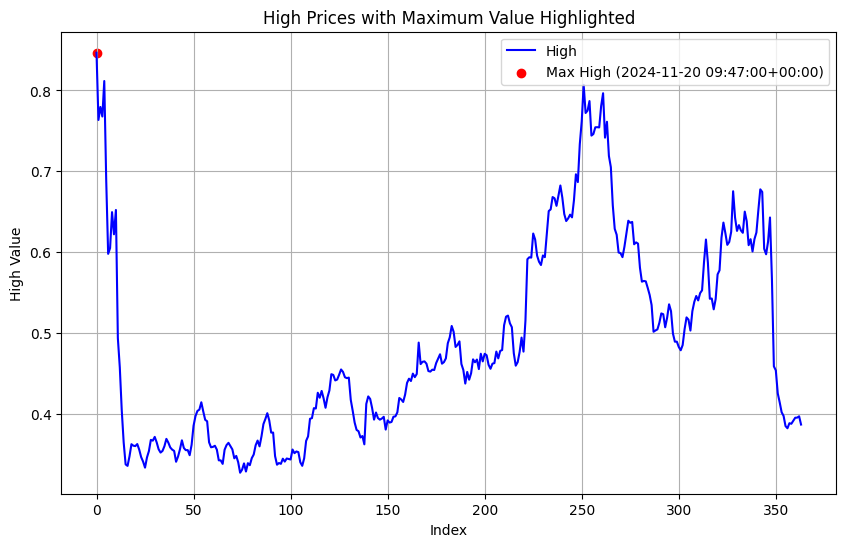

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cardano_history.index, cardano_history['high'], label='High', color='blue')
plt.scatter(max_index, cardano_history.loc[max_index, 'high'], color='red', label=f'Max High ({max_time_high})')
plt.title('High Prices with Maximum Value Highlighted')
plt.xlabel('Index')
plt.ylabel('High Value')
plt.legend()
plt.grid()
plt.show()

<ipython-input-17-ed319d4da9fd>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cardano_history['timestamp'], rotation = 60)


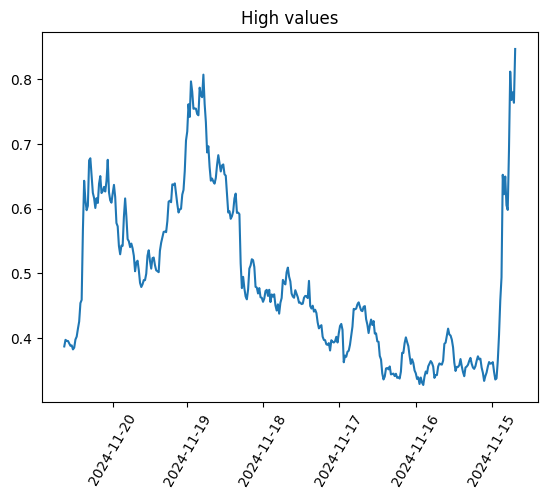

In [ ]:
fig, ax = plt.subplots()
ax.plot(cardano_history['timestamp'], cardano_history['high'])
ax.set_xticklabels(cardano_history['timestamp'], rotation = 60)
plt.title("High values")
plt.show()

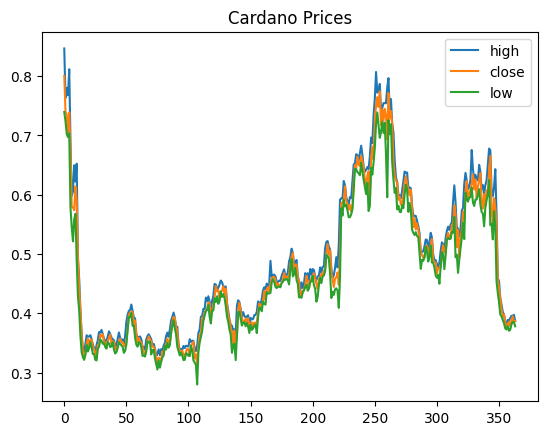

In [ ]:
cardano_history[['high', 'close', 'low']].plot(kind = 'line')
plt.title('Cardano Prices')
plt.show()

In [ ]:
cardano_history.drop(['name'], axis = 1)
cardano_history

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2024-11-20 00:00:00+00:00,2024-11-20 23:59:59.999000+00:00,2024-11-20 09:47:00+00:00,2024-11-20 00:01:00+00:00,2781,0.739637,0.846629,0.739472,0.800345,3.799020e+09,2.805432e+10,2024-11-20
1,2024-11-19 00:00:00+00:00,2024-11-19 23:59:59.999000+00:00,2024-11-19 07:07:00+00:00,2024-11-19 22:34:00+00:00,2781,0.734580,0.763529,0.723858,0.739642,1.551275e+09,2.591229e+10,2024-11-19
2,2024-11-18 00:00:00+00:00,2024-11-18 23:59:59.999000+00:00,2024-11-18 08:31:00+00:00,2024-11-18 00:02:00+00:00,2781,0.702301,0.779658,0.702262,0.734580,2.244334e+09,2.573513e+10,2024-11-18
3,2024-11-17 00:00:00+00:00,2024-11-17 23:59:59.999000+00:00,2024-11-17 00:28:00+00:00,2024-11-17 02:17:00+00:00,2781,0.738731,0.767812,0.697027,0.702325,2.319882e+09,2.460427e+10,2024-11-17
4,2024-11-16 00:00:00+00:00,2024-11-16 23:59:59.999000+00:00,2024-11-16 15:10:00+00:00,2024-11-16 00:00:00+00:00,2781,0.703398,0.811656,0.703316,0.738734,5.486836e+09,2.588054e+10,2024-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...
359,2023-11-27 00:00:00+00:00,2023-11-27 23:59:59.999000+00:00,2023-11-27 01:09:00+00:00,2023-11-27 20:33:00+00:00,2781,0.388113,0.391786,0.372034,0.378359,2.545702e+08,1.335539e+10,2023-11-27
360,2023-11-26 00:00:00+00:00,2023-11-26 23:59:59.999000+00:00,2023-11-26 00:53:00+00:00,2023-11-26 16:39:00+00:00,2781,0.394788,0.395569,0.381164,0.388185,2.345578e+08,1.370225e+10,2023-11-26
361,2023-11-25 00:00:00+00:00,2023-11-25 23:59:59.999000+00:00,2023-11-25 13:08:00+00:00,2023-11-25 00:08:00+00:00,2781,0.386220,0.395703,0.385702,0.394811,2.153223e+08,1.393516e+10,2023-11-25
362,2023-11-24 00:00:00+00:00,2023-11-24 23:59:59.999000+00:00,2023-11-24 03:49:00+00:00,2023-11-24 23:11:00+00:00,2781,0.386695,0.397344,0.384995,0.386213,3.508701e+08,1.363029e+10,2023-11-24


In [ ]:
cardano_close = pd.DataFrame(cardano_history[['close', 'timeClose']])

cardano_close = cardano_close.set_index('timeClose').sort_index(ascending=True)


print(cardano_close.head())


                                     close
timeClose                                 
2023-11-23 23:59:59.999000+00:00  0.386675
2023-11-24 23:59:59.999000+00:00  0.386213
2023-11-25 23:59:59.999000+00:00  0.394811
2023-11-26 23:59:59.999000+00:00  0.388185
2023-11-27 23:59:59.999000+00:00  0.378359


# Splitting the Data:Train & Test

In [ ]:
print(cardano_close)
df_train = cardano_close[:-12]
df_test = cardano_close[-12:]
print(f'\n Train Data \n{df_train[-12:]}')
print("\n Test Data \n", df_test)

                                     close
timeClose                                 
2023-11-23 23:59:59.999000+00:00  0.386675
2023-11-24 23:59:59.999000+00:00  0.386213
2023-11-25 23:59:59.999000+00:00  0.394811
2023-11-26 23:59:59.999000+00:00  0.388185
2023-11-27 23:59:59.999000+00:00  0.378359
...                                    ...
2024-11-16 23:59:59.999000+00:00  0.738734
2024-11-17 23:59:59.999000+00:00  0.702325
2024-11-18 23:59:59.999000+00:00  0.734580
2024-11-19 23:59:59.999000+00:00  0.739642
2024-11-20 23:59:59.999000+00:00  0.800345

[364 rows x 1 columns]

 Train Data 
                                     close
timeClose                                 
2024-10-28 23:59:59.999000+00:00  0.343796
2024-10-29 23:59:59.999000+00:00  0.355651
2024-10-30 23:59:59.999000+00:00  0.355264
2024-10-31 23:59:59.999000+00:00  0.341845
2024-11-01 23:59:59.999000+00:00  0.357090
2024-11-02 23:59:59.999000+00:00  0.347771
2024-11-03 23:59:59.999000+00:00  0.334285
2024-11-04 23:59

In [ ]:
print(df_train['close'][:1])
print(df_test['close'])

timeClose
2023-11-23 23:59:59.999000+00:00    0.386675
Name: close, dtype: float64
timeClose
2024-11-09 23:59:59.999000+00:00    0.493680
2024-11-10 23:59:59.999000+00:00    0.590309
2024-11-11 23:59:59.999000+00:00    0.613808
2024-11-12 23:59:59.999000+00:00    0.573918
2024-11-13 23:59:59.999000+00:00    0.578775
2024-11-14 23:59:59.999000+00:00    0.580116
2024-11-15 23:59:59.999000+00:00    0.674060
2024-11-16 23:59:59.999000+00:00    0.738734
2024-11-17 23:59:59.999000+00:00    0.702325
2024-11-18 23:59:59.999000+00:00    0.734580
2024-11-19 23:59:59.999000+00:00    0.739642
2024-11-20 23:59:59.999000+00:00    0.800345
Name: close, dtype: float64


# Original Close Data

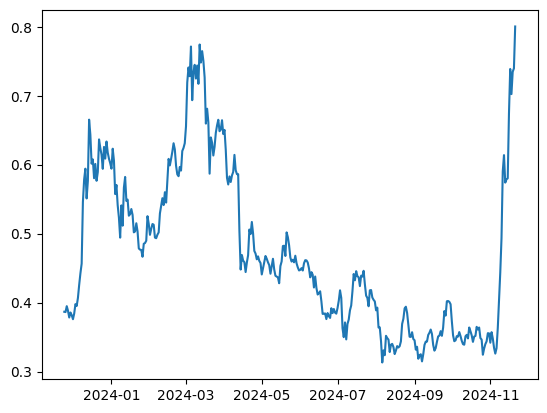

In [ ]:
plt.plot(cardano_close)
plt.show()

# Time Series Decomposition

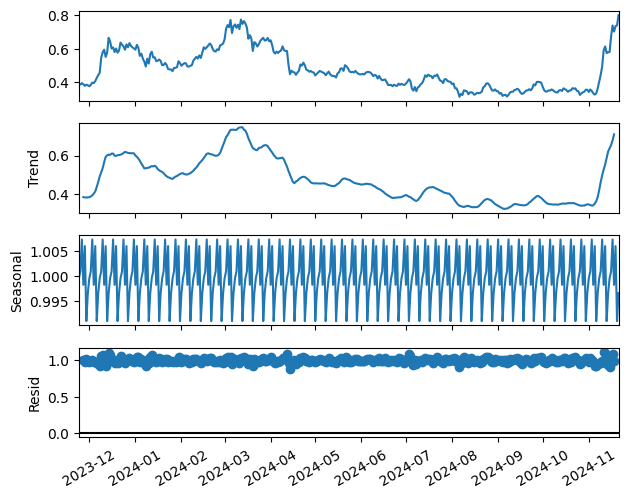

In [ ]:
# 7 * 52 = 364, we should observe 7 seasonality peaks
data_decompose = seasonal_decompose(cardano_close, model = 'multiplicative', period = 7)
data_decompose.plot()
plt.xticks(rotation = 30)
plt.show()

We can spot the existing and changing trend, but no seasonality, since the pattern isn't finished. Residuals tell us that an info provided by the trend and the seasonality components aren't enough!

# Original Data ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller
ADF_results = adfuller(cardano_close)
print(f'ADF Stats:{ADF_results[0]}')
print(f'p-value: {ADF_results[1]}')

ADF Stats:-0.7704434875668154
p-value: 0.8276502940316885


It is obvious that the p>>0.05 and we need differencing to get a stationary data

# First-Order Differencing of the Data

In [ ]:
diff_cardano_d1  = np.diff(cardano_close['close'], n = 1)
print(diff_cardano_d1[:5])

[-0.00046218  0.00859773 -0.00662622 -0.00982605  0.00726577]


ADF First-Order

In [ ]:
ADF_results_d1 = adfuller(diff_cardano_d1)
print(f'ADF Stats:{ADF_results_d1[0]}')
print(f'p-value: {ADF_results_d1[1]}')

ADF Stats:-3.9347538763175924
p-value: 0.0017934551827565451


After doing a simple first-order differencing, we got favorable stats and p-value. The data is stationary.

ADF test for the Fully Differenced Data

In [ ]:
diff_cardano = np.diff(np.diff(cardano_close['close'], n = 12), n = 1)
ADF_results_d2 = adfuller(diff_cardano)
print(f'ADF Stats: {ADF_results_d2[0]}')
print(f'p-value: {ADF_results_d2[1]}')

ADF Stats: -21.141198754454937
p-value: 0.0


Fist Ordered diffferenced Data Plot

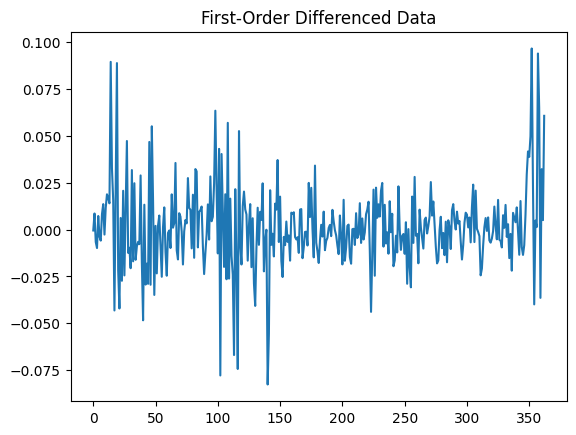

In [ ]:
plt.plot(diff_cardano_d1)
plt.title("First-Order Differenced Data")
plt.show()

# Seasonally Differenced Data

ADF test for Seasonally Differenced Data

In [ ]:
diff_cardano_seasonal = np.diff(cardano_close['close'], n = 12)
ADF_results_seasonal = adfuller(diff_cardano_seasonal)
print(f'ADF Stats:{ADF_results_seasonal[0]}')
print(f'p-value:{ADF_results_seasonal[1]}')

ADF Stats:-20.723044100971503
p-value:0.0


we can see that the p-value grew larger



# Seasonally Differenced Data's Plot

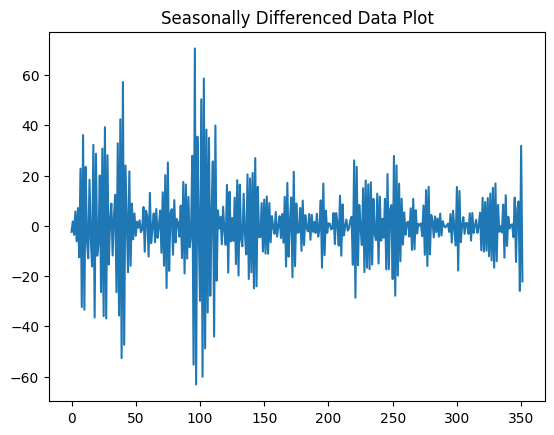

In [ ]:
plt.plot(diff_cardano_seasonal)
plt.title('Seasonally Differenced Data Plot')
plt.show()

# Fully Differenced Data's Plot



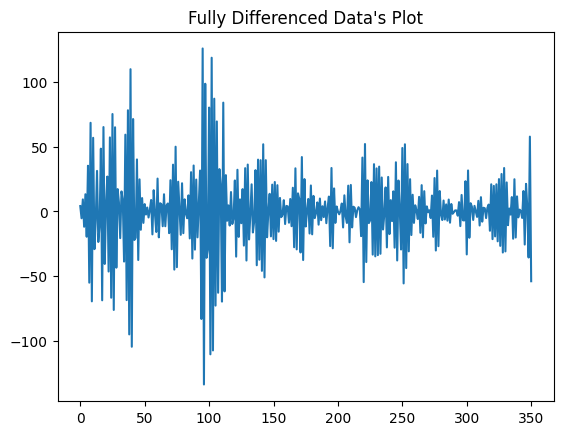

In [ ]:
plt.plot(diff_cardano)
plt.title("Fully Differenced Data's Plot")
plt.show()

# Original Data ACF

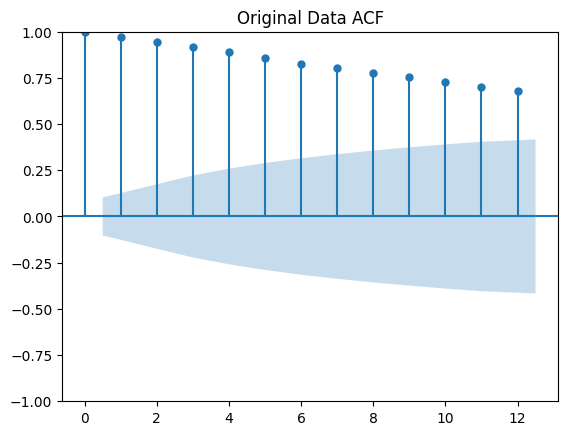

In [ ]:
plot_acf(cardano_close, lags=12)
plt.title('Original Data ACF')
plt.show()


The expected autocorrelation and the strong influence of the most recent data is obvious in the graph.

# First-order Differenced Data ACF

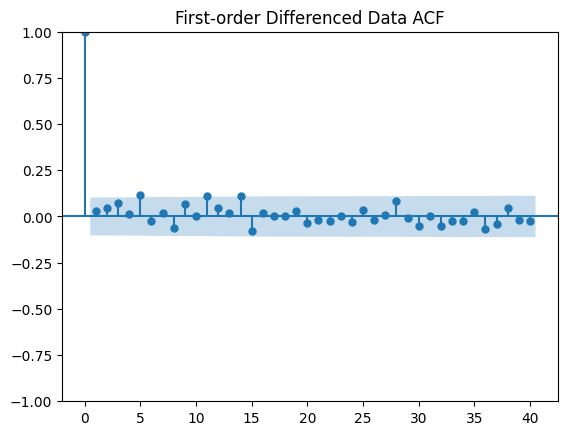

In [ ]:
plot_acf(diff_cardano_d1, lags = 40)
plt.title("First-order Differenced Data ACF")
plt.show()

According to the ADF and the ACF plot we prooved that the data is stationary, the pattern after the first lag is a white noise. Let's check for random walk

# Random Walk

In [ ]:
steps = []
steps.append(0)
steps.append(diff_cardano_d1)
drif_mean = np.mean(diff_cardano_d1)
print('Drift of the Data:',drif_mean)
# print(diff_cardano_d1)

Drift of the Data: 0.001139584861707989


In [ ]:
np.random.seed(42)
train_values = df_train['close'].values
test_values =df_test['close'].values
train_walk = [train_values[0]]

increments_train = np.random.normal(loc=np.mean(diff_cardano_d1[:-12]), scale=np.std(diff_cardano_d1[:-12]), size=len(train_values) - 1)
increments_test = np.random.normal(loc=np.mean(diff_cardano_d1[-12:]), scale=np.std(diff_cardano_d1[-12:]), size=len(test_values))

for inc in increments_train:
    train_walk.append(train_walk[-1] + inc)

test_walk = [train_walk[-1]]
for inc in increments_test:
    test_walk.append(test_walk[-1] + inc)


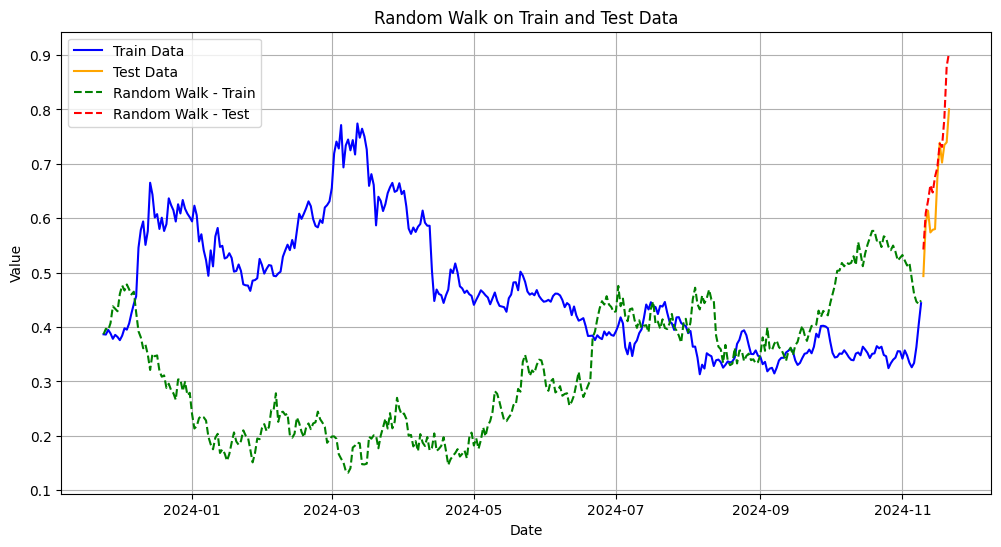

In [ ]:
train_walk = pd.Series(train_walk, index=df_train.index)
test_walk = pd.Series(test_walk[1:], index=df_test.index)
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['close'], label='Train Data', color='blue')
plt.plot(df_test.index, df_test['close'], label='Test Data', color='orange')
plt.plot(train_walk, label='Random Walk - Train', linestyle='--', color='green')
plt.plot(test_walk, label='Random Walk - Test', linestyle='--', color='red')
plt.legend()
plt.title("Random Walk on Train and Test Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
train_walk = pd.Series(train_walk, index=df_train.index)
test_walk = pd.Series(test_walk[1:], index=df_test.index)
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['close'], label='Train Data', color='blue')
plt.plot(df_test.index, df_test['close'], label='Test Data', color='orange')
plt.plot(train_walk, label='Random Walk - Train', linestyle='--', color='green')
plt.plot(test_walk, label='Random Walk - Test', linestyle='--', color='red')
plt.legend()
plt.title("Random Walk on Train and Test Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

The graph indicated that the data provided a good edtimation on the test set. Let's check the MAEs for both the train and the test sets

**Train & Test MAE of the Random Walk**

In [ ]:
random_wak_mae_train = mean_absolute_error(df_train['close'], train_walk)
random_wak_mae_test = mean_absolute_error(df_test['close'], test_walk)
random_walk_train_mape = mean_absolute_percentage_error(df_train['close'], train_walk)
randomTest_walk_test_mape = mean_absolute_percentage_error(df_test['close'], test_walk)
print("Random Walk MAE Train Error: ", random_wak_mae_train)
print(f'Random Walk MAE Test Error: {random_wak_mae_test}')
print("Random Walk MAPE Train: ", random_walk_train_mape)
print("Random Walk MAPE : ", randomTest_walk_test_mape)

Random Walk MAE Train Error:  0.20626384924772773
Random Walk MAE Test Error: 0.05666851804911857
Random Walk MAPE Train:  0.40043767610306946
Random Walk MAPE :  0.08781776262044139


# Fully Differenced Data ACF



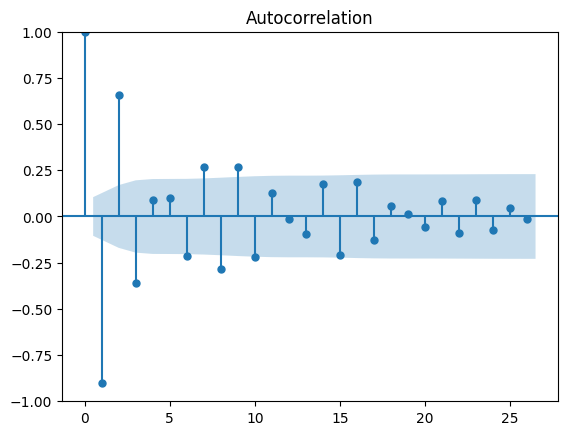

In [ ]:
plot_acf(diff_cardano)
plt.show()

# Seasonally Differenced Data's ACF



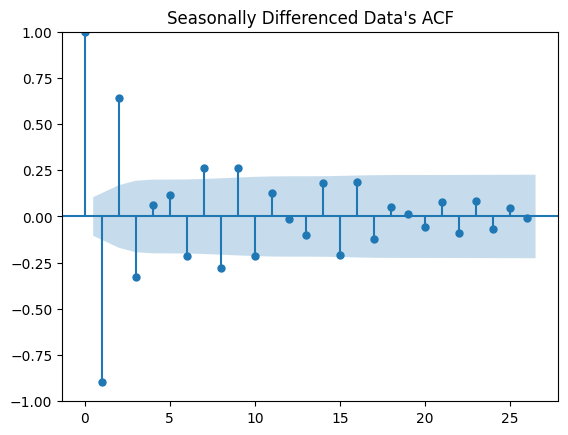

In [ ]:
plot_acf(diff_cardano_seasonal)
plt.title("Seasonally Differenced Data's ACF")
plt.show()

The fully differenced and seasonally differenced data have similar ACF
plots, because they have similar p-value 0.0.
Should we plot the PACF?

In [ ]:
print(f'First-ordered differeced data mean:{np.mean(diff_cardano_d1)}');
print(f'Seasonally differenced data mean: {np.mean(diff_cardano_seasonal)}');
print(f'Full differenced data mean: {np.mean(diff_cardano)}')
print(np.min([np.mean(diff_cardano_d1), np.mean(diff_cardano), np.mean(diff_cardano_seasonal)]))

First-ordered differeced data mean:0.001139584861707989
Seasonally differenced data mean: -0.023309123913636275
Full differenced data mean: -0.05624105748689483
-0.05624105748689483


First-ordered differeced data mean is the largest and the closest to the 0.

# Seasonal Data's PACF





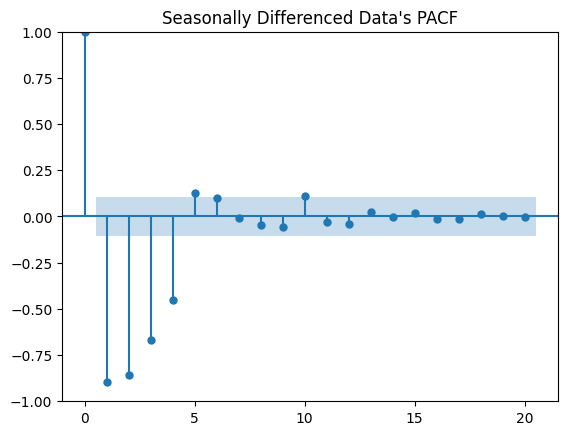

In [ ]:
plot_pacf(diff_cardano_seasonal, lags = 20)
plt.title("Seasonally Differenced Data's PACF")
plt.show()

# Fully Differenced Data's PACF

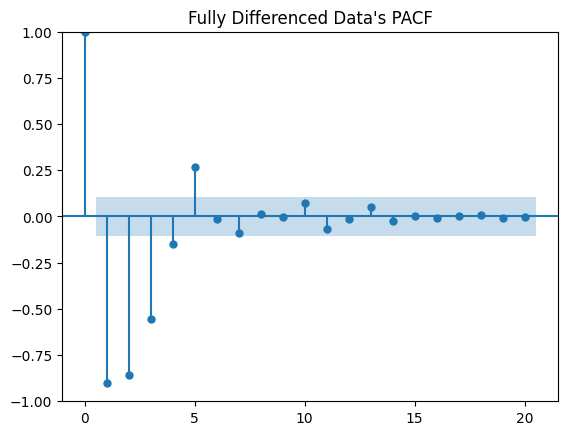

In [ ]:
plot_pacf(diff_cardano, lags = 20)
plt.title("Fully Differenced Data's PACF")
plt.show()

Even the PACF plots are similar, no noticable difference between the sign. and non-sign. lags

# Checking for the ARMA

# Optmizing the ARIMA model

In [ ]:
model=pmd.auto_arima(df_train['close'],start_p=1,start_q=1,test='adf',m=1,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1740.756, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=485.750, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1739.198, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-357.899, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1738.188, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1744.816, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-945.040, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1746.513, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-531.935, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1744.832, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1745.

Seems like that the best suggestion is the naive, since we don't have any significant drift or white noise component here.


In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  352
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 876.256
Date:                Mon, 02 Dec 2024   AIC                          -1746.513
Time:                        07:17:35   BIC                          -1734.922
Sample:                    11-23-2023   HQIC                         -1741.900
                         - 11-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0074      0.005      1.478      0.139      -0.002       0.017
ar.L1          0.9836      0.009    109.362      0.000       0.966       1.001
sigma2         0.0004   1.82e-05     21.977      0.0

In [ ]:
model_train = SARIMAX(df_train['close'], order = (1,0,0), seasonal_order=(0,0,0,12))
model_train_fit = model_train.fit()
predicted_train=model_train_fit.predict();
predicted_train

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,predicted_mean
2023-11-23 23:59:59.999000+00:00,0.000000
2023-11-24 23:59:59.999000+00:00,0.386452
2023-11-25 23:59:59.999000+00:00,0.385990
2023-11-26 23:59:59.999000+00:00,0.394582
2023-11-27 23:59:59.999000+00:00,0.387960
...,...
2024-11-04 23:59:59.999000+00:00,0.334091
2024-11-05 23:59:59.999000+00:00,0.325830
2024-11-06 23:59:59.999000+00:00,0.333730
2024-11-07 23:59:59.999000+00:00,0.363113


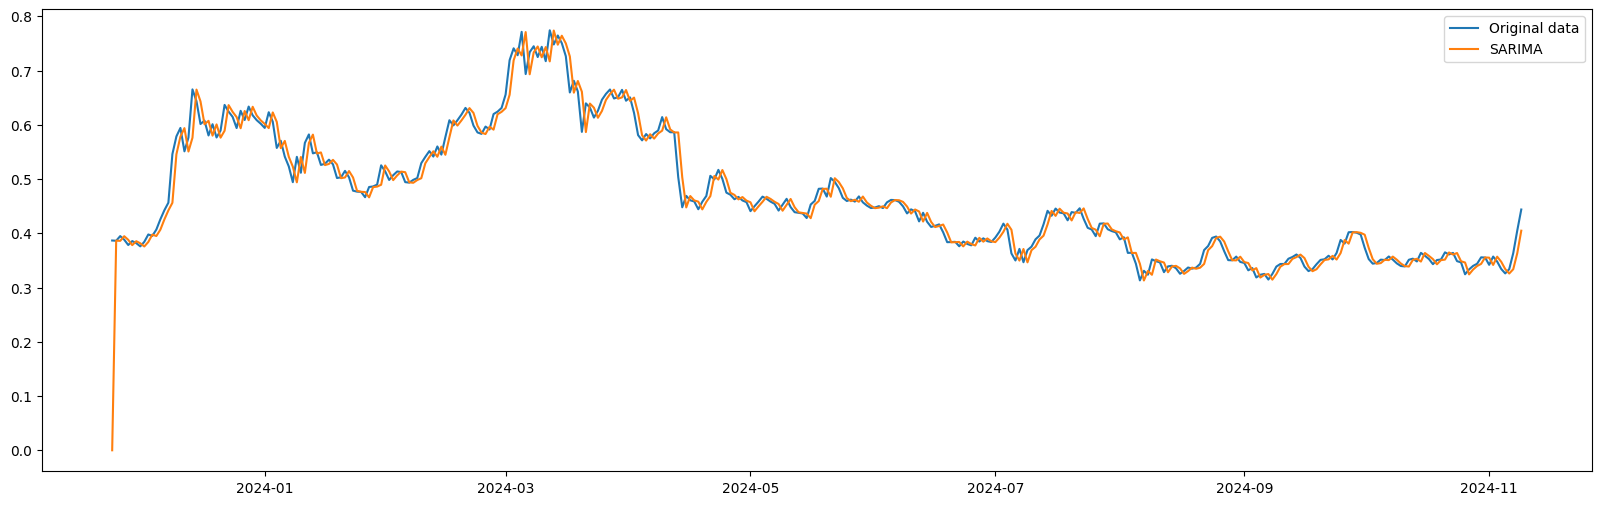

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df_train['close'],label='Original data')
plt.plot(predicted_train, label = "SARIMA")
plt.legend()
plt.show()

In [ ]:
train_error=mean_squared_error(df_train['close'],predicted_train)
print(f'Train Error:{train_error}')

Train Error:0.000826668697427181


In [ ]:
model_test=SARIMAX(df_test['close'], order=(1, 0,0), seasonal_order=(0,0,0,12))
pred_test=model_test.fit().predict();pred_test

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


,predicted_mean
2024-11-09 23:59:59.999000+00:00,0.000000
2024-11-10 23:59:59.999000+00:00,0.492126
2024-11-11 23:59:59.999000+00:00,0.588451
2024-11-12 23:59:59.999000+00:00,0.611875
2024-11-13 23:59:59.999000+00:00,0.572111
2024-11-14 23:59:59.999000+00:00,0.576953
2024-11-15 23:59:59.999000+00:00,0.578290
2024-11-16 23:59:59.999000+00:00,0.671938
2024-11-17 23:59:59.999000+00:00,0.736408
2024-11-18 23:59:59.999000+00:00,0.700114


In [ ]:
test_error=mean_squared_error(df_test['close'],pred_test)
test_sarima_mae = mean_absolute_error(df_test['close'], pred_test)
print(f'Test MSE Error:{test_error}')
print("Test MAE Error", test_sarima_mae)

Test MSE Error:0.022959034530487973
Test MAE Error 0.08054379468255905


In [ ]:
predicted_test_sarima = model_train_fit.get_prediction(steps=len(df_test)).predicted_mean
print(predicted_test_sarima)
print('\n Test \n',df_test)
test_error2=mean_absolute_error(df_test['close'],predicted_test_sarima[-12:])
print(f'\n Test Error:{test_error2}')

2023-11-23 23:59:59.999000+00:00    0.000000
2023-11-24 23:59:59.999000+00:00    0.386452
2023-11-25 23:59:59.999000+00:00    0.385990
2023-11-26 23:59:59.999000+00:00    0.394582
2023-11-27 23:59:59.999000+00:00    0.387960
                                      ...   
2024-11-04 23:59:59.999000+00:00    0.334091
2024-11-05 23:59:59.999000+00:00    0.325830
2024-11-06 23:59:59.999000+00:00    0.333730
2024-11-07 23:59:59.999000+00:00    0.363113
2024-11-08 23:59:59.999000+00:00    0.404779
Freq: D, Name: predicted_mean, Length: 352, dtype: float64

 Test 
                                      close
timeClose                                 
2024-11-09 23:59:59.999000+00:00  0.493680
2024-11-10 23:59:59.999000+00:00  0.590309
2024-11-11 23:59:59.999000+00:00  0.613808
2024-11-12 23:59:59.999000+00:00  0.573918
2024-11-13 23:59:59.999000+00:00  0.578775
2024-11-14 23:59:59.999000+00:00  0.580116
2024-11-15 23:59:59.999000+00:00  0.674060
2024-11-16 23:59:59.999000+00:00  0.738734
2024-11

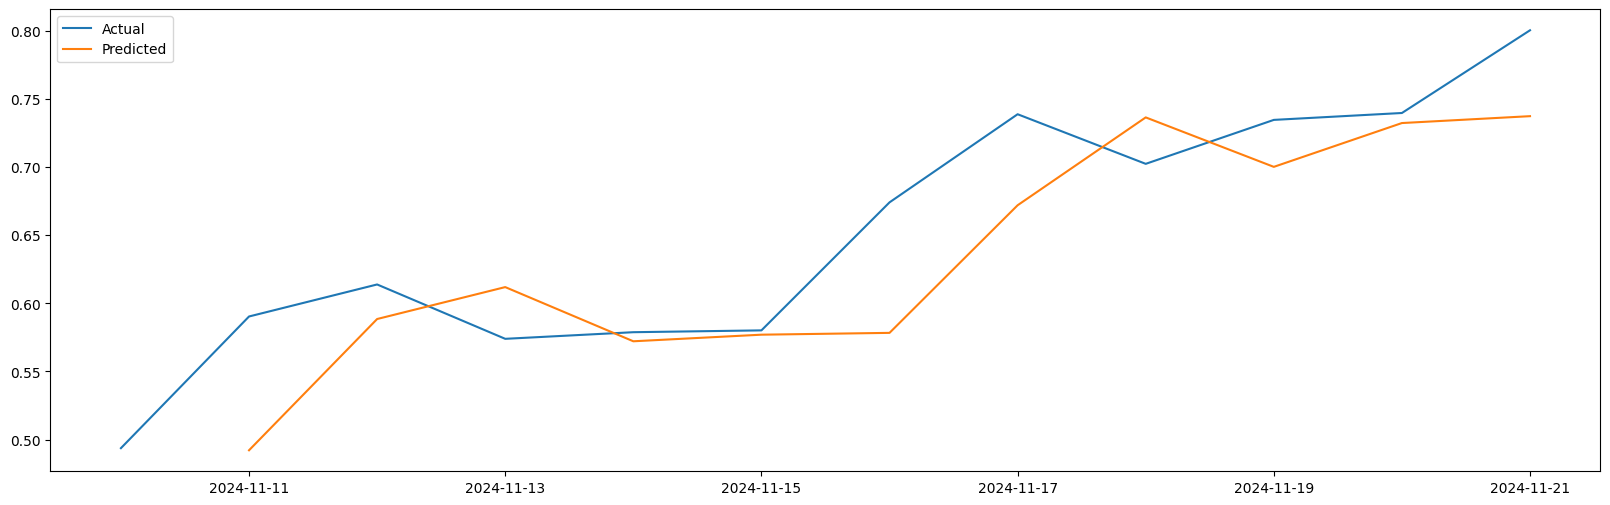

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df_test['close'],label='Actual')
# Since the first value is a 0.0, I am excluding it from the graph
# print(pred_test[0]) 0.0
plt.plot(pred_test[1:],label='Predicted')
plt.legend()


In [ ]:
model_train=SARIMAX(df_train['close'],order=(1,0,0),seasonal_order=(0,0,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


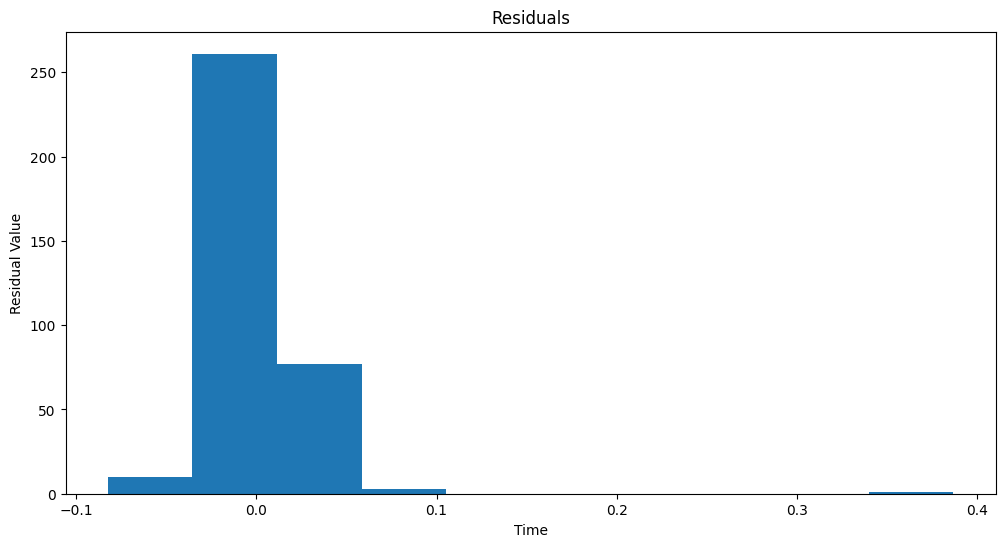

In [ ]:
residuals_train = model_train.fit().resid
plt.figure(figsize=(12, 6))
plt.hist(residuals_train)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.show()

Let's check if the mean is close to 0

In [ ]:
print(f'Residual Mean: {np.mean(residuals_train)}')
print(f'Residual Standard Deviation {np.std(residuals_train)}')

Residual Mean: 0.0015306844837309048
Residual Standard Deviation 0.028711072819357437


Mean of the residuals is close but not 0.0


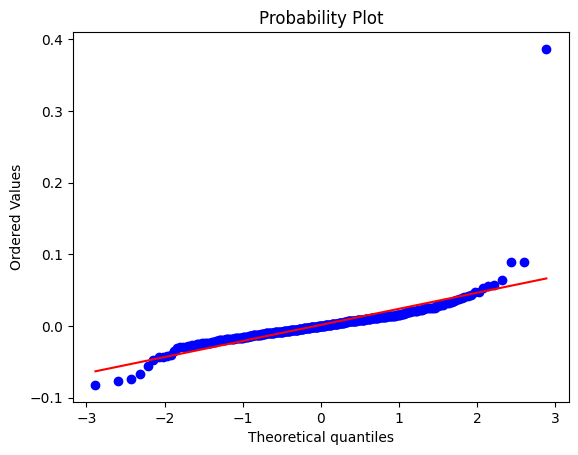

In [ ]:
stats.probplot(residuals_train, dist="norm", plot=pylab)
pylab.show()

In [ ]:
lb_train = acorr_ljungbox(residuals_train, lags=[10, 20], return_df=True)
print(lb_train)

      lb_stat  lb_pvalue
10   2.965718   0.982219
20  16.505682   0.684799


In [ ]:
resid_test = model_test.fit().resid

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
lb_test = acorr_ljungbox(resid_test, return_df=True)
print(lb_test)

    lb_stat  lb_pvalue
1  0.302174   0.582523
2  0.335251   0.845671


For both the train and test datasets the differenced data's residuals are not autocorrelated.

# Residual ACF

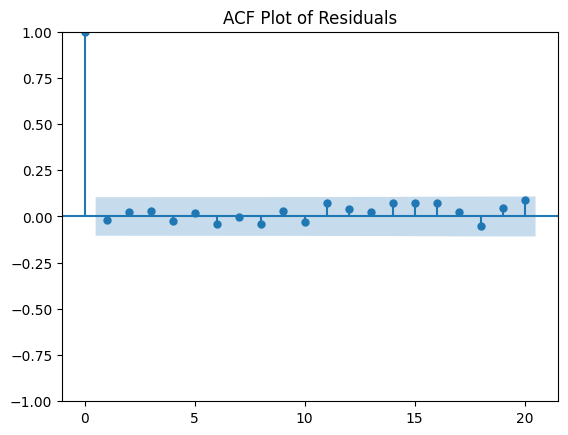

In [ ]:
plot_acf(residuals_train, lags=20)
plt.title('ACF Plot of Residuals')
plt.show()

In [ ]:
model_fit = model_train.fit()

In [ ]:
forecast_test = model_fit.forecast(steps = 12)
test_forc_error = mean_squared_error(df_test['close'], forecast_test)
print(f'Fit test forecast MSE error: {test_forc_error}')
print("\n Forecasted data \n", forecast_test)

Fit test forecast MSE error: 0.051886550525288115

 Forecasted data 
 2024-11-09 23:59:59.999000+00:00    0.443559
2024-11-10 23:59:59.999000+00:00    0.443302
2024-11-11 23:59:59.999000+00:00    0.443045
2024-11-12 23:59:59.999000+00:00    0.442789
2024-11-13 23:59:59.999000+00:00    0.442533
2024-11-14 23:59:59.999000+00:00    0.442277
2024-11-15 23:59:59.999000+00:00    0.442021
2024-11-16 23:59:59.999000+00:00    0.441765
2024-11-17 23:59:59.999000+00:00    0.441509
2024-11-18 23:59:59.999000+00:00    0.441254
2024-11-19 23:59:59.999000+00:00    0.440999
2024-11-20 23:59:59.999000+00:00    0.440743
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
print(forecast_test);
print('\n Test data \n',df_test['close']);
print('\n Train Last 5 \n',df_train['close'][-5:]);
print('\n Test Forecast\n', forecast_test)

2024-11-09 23:59:59.999000+00:00    0.443559
2024-11-10 23:59:59.999000+00:00    0.443302
2024-11-11 23:59:59.999000+00:00    0.443045
2024-11-12 23:59:59.999000+00:00    0.442789
2024-11-13 23:59:59.999000+00:00    0.442533
2024-11-14 23:59:59.999000+00:00    0.442277
2024-11-15 23:59:59.999000+00:00    0.442021
2024-11-16 23:59:59.999000+00:00    0.441765
2024-11-17 23:59:59.999000+00:00    0.441509
2024-11-18 23:59:59.999000+00:00    0.441254
2024-11-19 23:59:59.999000+00:00    0.440999
2024-11-20 23:59:59.999000+00:00    0.440743
Freq: D, Name: predicted_mean, dtype: float64

 Test data 
 timeClose
2024-11-09 23:59:59.999000+00:00    0.493680
2024-11-10 23:59:59.999000+00:00    0.590309
2024-11-11 23:59:59.999000+00:00    0.613808
2024-11-12 23:59:59.999000+00:00    0.573918
2024-11-13 23:59:59.999000+00:00    0.578775
2024-11-14 23:59:59.999000+00:00    0.580116
2024-11-15 23:59:59.999000+00:00    0.674060
2024-11-16 23:59:59.999000+00:00    0.738734
2024-11-17 23:59:59.999000+00:

In [ ]:
test_mae = mean_absolute_error(df_test['close'], forecast_test)
print("Test SARIMAX Naive MAE:",test_mae)


Test SARIMAX Naive MAE: 0.20954139439874828




*  Check for seasonal naive
*   Check for ARCH/GARCH



In [ ]:
from arch import arch_model
# Calculate log returns
cardano_close['log_return'] = np.log(cardano_close['close'] / cardano_close['close'].shift(1))
# returns = cardano_close['log_return'].dropna()
returns = 100 * cardano_close['close'].pct_change().dropna()

garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1013.55
Distribution:                  Normal   AIC:                           2035.09
Method:            Maximum Likelihood   BIC:                           2050.67
                                        No. Observations:                  363
Date:                Mon, Dec 02 2024   Df Residuals:                      362
Time:                        07:36:38   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0270      0.187     -0.144      0.885 [ -0.394,  0.34

In [ ]:
forecast_garch = garch_fit.forecast(horizon=10)
print(forecast_garch.variance)

                                       h.01      h.02     h.03       h.04  \
timeClose                                                                   
2024-11-20 23:59:59.999000+00:00  38.065487  35.65362  33.5534  31.724559   

                                       h.05       h.06       h.07       h.08  \
timeClose                                                                      
2024-11-20 23:59:59.999000+00:00  30.132029  28.745276  27.537712  26.486181   

                                       h.09       h.10  
timeClose                                               
2024-11-20 23:59:59.999000+00:00  25.570523  24.773181  


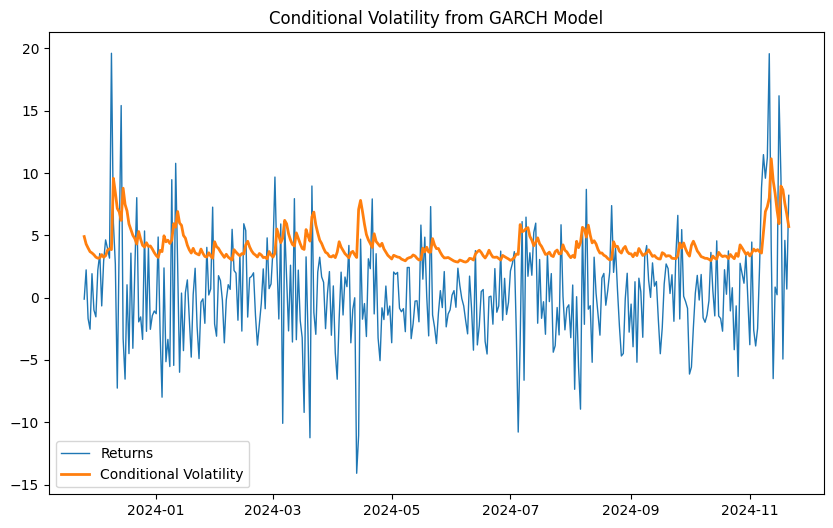

In [ ]:
  plt.figure(figsize=(10, 6))
plt.plot(returns, label='Returns', lw = 1)
plt.plot(garch_fit.conditional_volatility, label='Conditional Volatility', lw =2)
plt.title('Conditional Volatility from GARCH Model')
plt.legend()
plt.show()

<ipython-input-121-183eff00fd23>:5: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim([forecast_garch.variance.index[-10:], forecast_garch.variance.index[-1]])


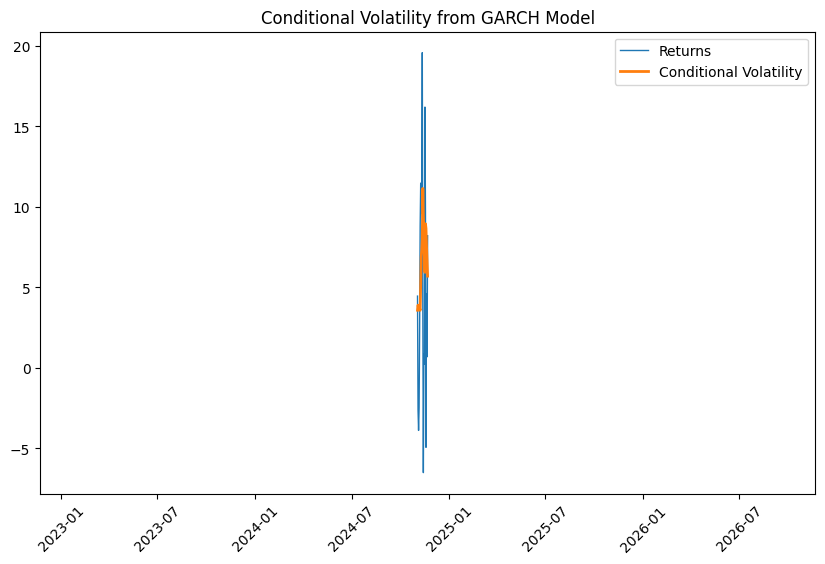

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(returns[-20:], label='Returns', lw = 1)
# plt.plot(garch_fit.conditional_volatility[-20:], label='Conditional Volatility', lw =2)
# plt.title('Conditional Volatility from GARCH Model')
# plt.xlim([forecast_garch.variance.index[-10:], forecast_garch.variance.index[-1]])
# plt.xticks(rotation = 45)
# plt.legend()
# plt.show()

In [ ]:
future_dates = pd.date_range(start=df_test.index[-1] + pd.Timedelta(days=1), periods=10)
forecasted_variances = forecast_garch.variance.iloc[-1].values
predictions_df = pd.DataFrame({'Date': future_dates, 'Forecasted Variance': forecasted_variances})
print(predictions_df)

                              Date  Forecasted Variance
0 2024-11-21 23:59:59.999000+00:00            38.065487
1 2024-11-22 23:59:59.999000+00:00            35.653620
2 2024-11-23 23:59:59.999000+00:00            33.553400
3 2024-11-24 23:59:59.999000+00:00            31.724559
4 2024-11-25 23:59:59.999000+00:00            30.132029
5 2024-11-26 23:59:59.999000+00:00            28.745276
6 2024-11-27 23:59:59.999000+00:00            27.537712
7 2024-11-28 23:59:59.999000+00:00            26.486181
8 2024-11-29 23:59:59.999000+00:00            25.570523
9 2024-11-30 23:59:59.999000+00:00            24.773181


# Naive Seasonal

In [ ]:
def seasonal_naive_calc(train, test, season_length):
    """
    Seasonal Naive Forecasting Method

    Parameters:
    - train: The training data (pandas Series or DataFrame).
    - test: The test data (pandas Series or DataFrame).
    - season_length: The length of the season (e.g., 12 for monthly data).

    Returns:
    - forecast: Forecasted values for the test data.
    """
    forecast = []
    for i in range(len(test)):
        forecast.append(train.iloc[-season_length + i % season_length])
    return pd.DataFrame(forecast, index=test.index)


In [ ]:
df_test_seasonal = df_train['close'][-12:]
mape_naive_seasonal = mean_absolute_percentage_error(df_test, df_test_seasonal)
print('\n Test Naive Seasonal MAPE Error', mape_naive_seasonal)


 Test Naive Seasonal MAPE Error 0.4417356899209694


In [ ]:
df_test_naive_seasonal = cardano_close[-12:]

In [ ]:
forecast_naive_seasonal = seasonal_naive_calc(df_train,df_test_naive_seasonal, 12)
print(f"\n Forecasted Seasonal Naive {forecast_naive_seasonal}")


 Forecasted Seasonal Naive                                      close
timeClose                                 
2024-11-09 23:59:59.999000+00:00  0.343796
2024-11-10 23:59:59.999000+00:00  0.355651
2024-11-11 23:59:59.999000+00:00  0.355264
2024-11-12 23:59:59.999000+00:00  0.341845
2024-11-13 23:59:59.999000+00:00  0.357090
2024-11-14 23:59:59.999000+00:00  0.347771
2024-11-15 23:59:59.999000+00:00  0.334285
2024-11-16 23:59:59.999000+00:00  0.326019
2024-11-17 23:59:59.999000+00:00  0.333924
2024-11-18 23:59:59.999000+00:00  0.363323
2024-11-19 23:59:59.999000+00:00  0.405013
2024-11-20 23:59:59.999000+00:00  0.443815


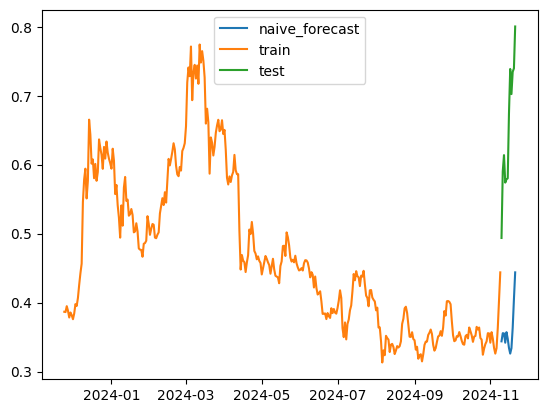

In [ ]:
plt.plot(forecast_naive_seasonal, label = 'naive_forecast')
plt.plot(df_train, label = 'train')
plt.plot(df_test, label  = 'test')
plt.legend()
plt.show()

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive
seasonal_naive2 = SeasonalNaive(season_length=12)
seasonal_naive2.fit(y=df_train['close'])


season_forecast_ = seasonal_naive2.predict(h=len(df_test))
print("Forecasted values:", season_forecast_['mean'])
mae_season_naive_ = mean_absolute_error(df_test['close'],  season_forecast_['mean'])
print('\n Test Naive Seasonal MAE:', mae_season_naive_)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Forecasted values: [0.34379588 0.35565111 0.35526447 0.34184519 0.35708993 0.34777137
 0.33428469 0.32601878 0.33392358 0.36332276 0.40501301 0.44381548]

 Test Naive Seasonal MAE: 0.29270804263333333


Let's use an LSTM